In [1]:
import sys
import os
from IPython.core.display import display, HTML

"""
On Windows, sometimes, some cuda libraries does not work very well. One needs to add the cuda path mannually.
The following line is an example.
"""
os.environ['NUMBAPRO_CUDALIB']=r"C:\Users\hyli93\Miniconda3\envs\python36\Library\bin"

"""
Because I have not realised this package. To use this package, one can not simply install with pip.
Instead, one needs to clone from the repo and append the path to this repo to the system path variable.
"""
sys.path.append('C:/Users/hyli93/Documents/GitHub/Phasing/')

"""
This line is totally optional. It only changes the cell width.
"""
display(HTML("<style>.container { width:95% !important; }</style>"))

# Import some other necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import PhaseTool   # This is the name of this package
import copy
from scipy import ndimage

# Create an object

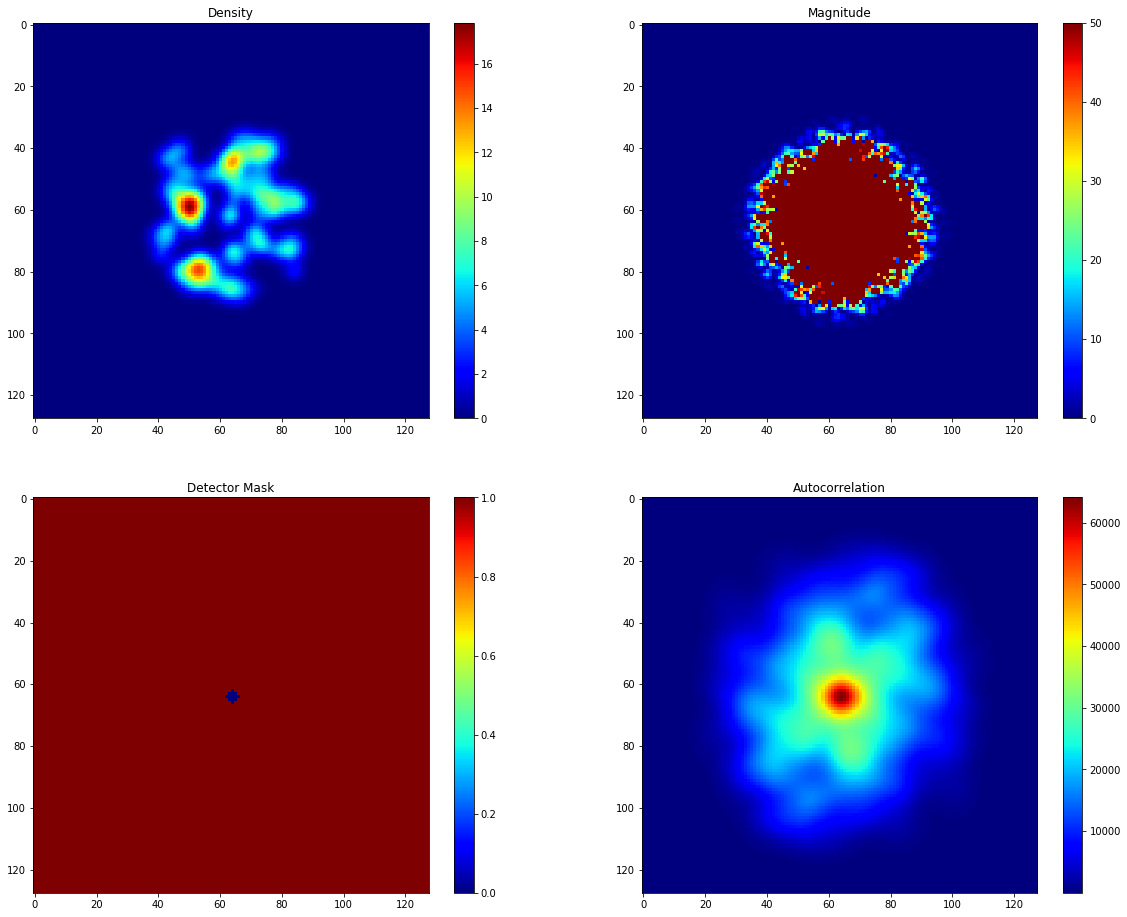

In [5]:
sample = PhaseTool.util.SmoothSample()


############################################################################################################
#  Show sample information
############################################################################################################
# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(sample.density, cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Density")

im = axes[0,1].imshow(sample.intensity, vmax=50, cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Magnitude")

im = axes[1,0].imshow(sample.detector_mask,vmin=0, vmax=1, cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("Detector Mask")

im = axes[1,1].imshow(PhaseTool.util.get_autocorrelation(sample.intensity), vmin=0.4 ,cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("Autocorrelation")

# Show the canvas
plt.show()  

# AlterProjChain

In [6]:
"""
This aims to test the AlterProjChain object. No beam stop, no noise. The reuslt should be a perfect reconstruction with the default algorithm sequence.
"""
# Create a toolchain object and initialize the data.
toolchain = PhaseTool.ToolChain.AlterProjChain(intensity=sample.intensity,
                                               detector_mask=np.ones_like(sample.intensity, dtype=np.bool),
                                               keep_full_history=True)

# Specify the defualt toolchains to use
toolchain.use_default_algorithm_sequence(idx=1)

# Show the information of this algorithm sequence
toolchain.show_introduction_and_algorithm_sequence(show_detail=False)

# Execute this tool chain.
toolchain.execute_algorithm_sequence()

----------------------------Part 0: Introduction-----------------------------------
When doing phase retrieval, it seems a little bit difficult to do it with a single algorithm. Therefore I created this AlterProjChain object to organize a sequence of different projection methods. Therefore, this object is not fundamental. You can definitely combine CpuAlterProj objects to finished whatever you can do with this object and more.

In this object, the calculation sequence is controlled with a list called algorithm_sequence. Each element in this list is a dictionary. Each dictionary contains complete information for one group of alternating projection algorithm.

----------------------------Part 1: Current Sequence Summary-----------------------
At present there are totally 3 elements in the algorithm sequence.
They are respectively:

For algorithm No.0
Algorithm Name:RAAR
Iteration Number:1200
Use Shrink Wrap:False


For algorithm No.1
Algorithm Name:RAAR
Iteration Number:1200
Use Shrink W

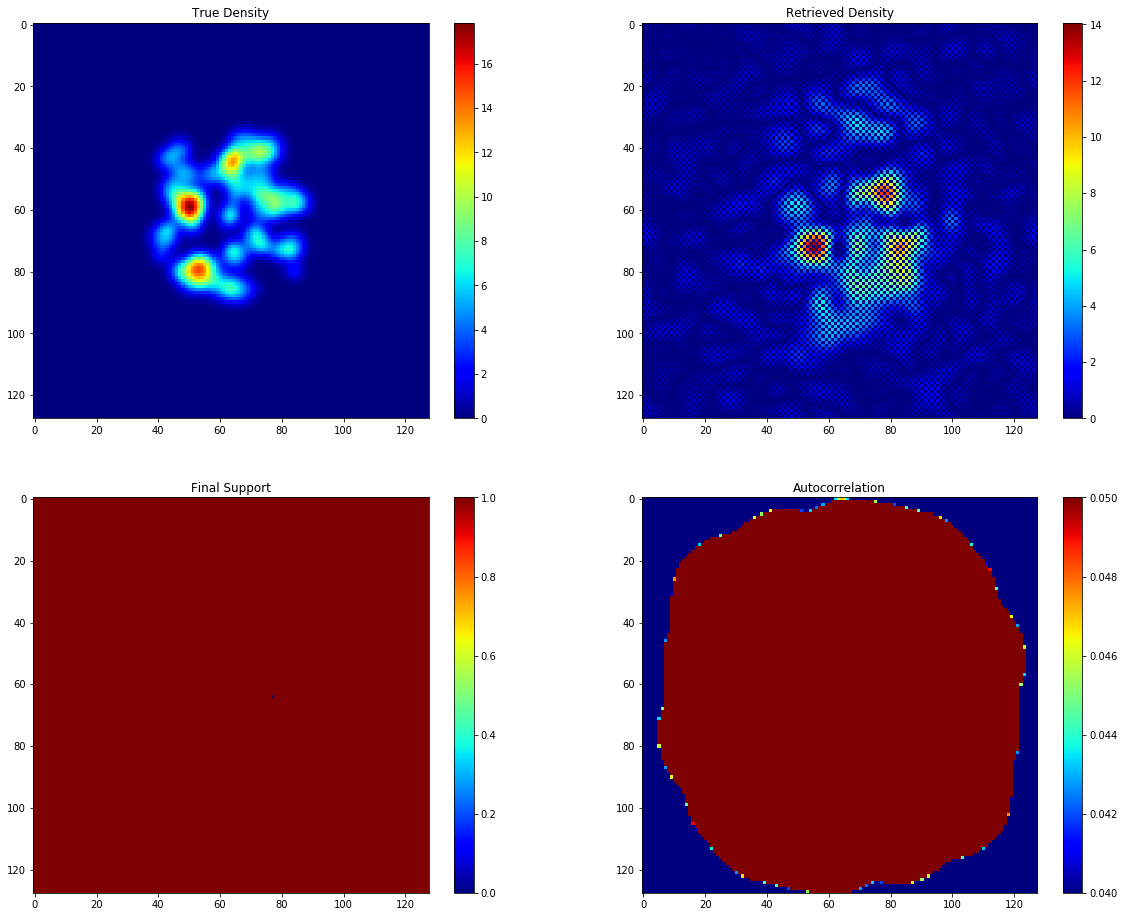

In [9]:
############################################################################################################
#  Show Result
############################################################################################################

# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(sample.density, cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("True Density")

im = axes[0,1].imshow(np.fft.ifftshift(toolchain.alter_proj_obj.density), cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Retrieved Density")

im = axes[1,0].imshow(np.fft.ifftshift(toolchain.alter_proj_obj.support), vmin=0, vmax=1, cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("Final Support")

im = axes[1,1].imshow(PhaseTool.util.get_autocorrelation(sample.intensity), vmin=0.04, vmax=0.05 ,cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("Autocorrelation")

# Show the canvas
plt.show()  

In [11]:
toolchain.show_introduction_and_algorithm_sequence(show_detail=True)


----------------------------Part 0: Introduction-----------------------------------
When doing phase retrieval, it seems a little bit difficult to do it with a single algorithm. Therefore I created this AlterProjChain object to organize a sequence of different projection methods. Therefore, this object is not fundamental. You can definitely combine CpuAlterProj objects to finished whatever you can do with this object and more.

In this object, the calculation sequence is controlled with a list called algorithm_sequence. Each element in this list is a dictionary. Each dictionary contains complete information for one group of alternating projection algorithm.

----------------------------Part 1: Current Sequence Summary-----------------------
At present there are totally 3 elements in the algorithm sequence.
They are respectively:

For algorithm No.0
Algorithm Name:RAAR
Iteration Number:1200
Use Shrink Wrap:False


For algorithm No.1
Algorithm Name:RAAR
Iteration Number:1200
Use Shrink W